In [731]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.utils import resample

In [732]:
Data=pd.read_csv('Loan train data.csv')

In [733]:
Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [734]:
Data.shape

(614, 13)

In [735]:
Data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [736]:
Data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [737]:
Data = Data.dropna()

In [738]:
Data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [739]:
cleaned_Data = pd.DataFrame(Data)

In [740]:
cleaned_Data['Loan_ID'] = pd.Categorical(cleaned_Data['Loan_ID']).codes
cleaned_Data['Gender'] = pd.Categorical(cleaned_Data['Gender']).codes
cleaned_Data['Married'] = pd.Categorical(cleaned_Data['Married']).codes
cleaned_Data['Dependents'] = pd.Categorical(cleaned_Data['Dependents']).codes
cleaned_Data['Education'] = pd.Categorical(cleaned_Data['Education']).codes
cleaned_Data['Self_Employed'] = pd.Categorical(cleaned_Data['Self_Employed']).codes
cleaned_Data['Property_Area'] = pd.Categorical(cleaned_Data['Property_Area']).codes
cleaned_Data['Loan_Status'] = pd.Categorical(cleaned_Data['Loan_Status']).codes

In [741]:
cleaned_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    int16  
 1   Gender             480 non-null    int8   
 2   Married            480 non-null    int8   
 3   Dependents         480 non-null    int8   
 4   Education          480 non-null    int8   
 5   Self_Employed      480 non-null    int8   
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int8   
 12  Loan_Status        480 non-null    int8   
dtypes: float64(4), int16(1), int64(1), int8(7)
memory usage: 26.7 KB


In [742]:
import pandas as pd
import numpy as np

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)


# Set seed for reproducibility
np.random.seed(0)

# Generating the DataFrame
data_point_outliers = np.random.normal(10, 1000, 5000)
data_point_outliers[0] = 150
df = pd.DataFrame(data_point_outliers, columns=[' ApplicantIncome '])

# Function to detect outliers using Z-score
def detect_outliers_z_score(df):
    threshold = 3
    mean = df[' ApplicantIncome '].mean()
    std_dev = df[' ApplicantIncome '].std()
    df['Z_Score'] = (df[' ApplicantIncome '] - mean) / std_dev
    df['Outlier'] = abs(df['Z_Score']) > threshold
    return df

# Detect outliers using Z-score
df_outliers_z_score = detect_outliers_z_score(df)

# Print DataFrame with outliers where 'Outlier' column is True
print("DataFrame with Z-score Outliers:")
print(df_outliers_z_score[df_outliers_z_score['Outlier']])

DataFrame with Z-score Outliers:
       ApplicantIncome    Z_Score  Outlier
589        -3036.143055 -3.076887     True
1054        3180.974773  3.234161     True
1446       -2984.612860 -3.024578     True
2018       -3106.856592 -3.148669     True
3082        3316.574349  3.371809     True
3118        3811.660215  3.874375     True
3447        3437.538547  3.494601     True
3462       -2996.498715 -3.036644     True
3679       -3382.299993 -3.428274     True
3752       -3730.100638 -3.781329     True
4469       -2997.437204 -3.037596     True
4909        2989.976172  3.040277     True


In [743]:
import pandas as pd
import numpy as np

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)


# Set seed for reproducibility
np.random.seed(0)

# Generating the DataFrame
data_point_outliers = np.random.normal(10, 1000, 5000)
data_point_outliers[0] = 150
df = pd.DataFrame(data_point_outliers, columns=[' CoapplicantIncome'])

# Function to detect outliers using Z-score
def detect_outliers_z_score(df):
    threshold = 3
    mean = df[' CoapplicantIncome'].mean()
    std_dev = df[' CoapplicantIncome'].std()
    df['Z_Score'] = (df[' CoapplicantIncome'] - mean) / std_dev
    df['Outlier'] = abs(df['Z_Score']) > threshold
    return df

# Detect outliers using Z-score
df_outliers_z_score = detect_outliers_z_score(df)

# Print DataFrame with outliers where 'Outlier' column is True
print("DataFrame with Z-score Outliers:")
print(df_outliers_z_score[df_outliers_z_score['Outlier']])

DataFrame with Z-score Outliers:
       CoapplicantIncome   Z_Score  Outlier
589         -3036.143055 -3.076887     True
1054         3180.974773  3.234161     True
1446        -2984.612860 -3.024578     True
2018        -3106.856592 -3.148669     True
3082         3316.574349  3.371809     True
3118         3811.660215  3.874375     True
3447         3437.538547  3.494601     True
3462        -2996.498715 -3.036644     True
3679        -3382.299993 -3.428274     True
3752        -3730.100638 -3.781329     True
4469        -2997.437204 -3.037596     True
4909         2989.976172  3.040277     True


In [744]:
import pandas as pd
import numpy as np

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Set seed for reproducibility
np.random.seed(0)

# Generating the DataFrame
data_point_outliers = np.random.normal(10, 1000, 5000)
data_point_outliers[0] = 150  # Introducing a significant outlier
df = pd.DataFrame(data_point_outliers, columns=['LoanAmount'])

# Function to detect outliers using Z-score
def detect_outliers_z_score(df):
    threshold = 3
    mean = df['LoanAmount'].mean()
    std_dev = df['LoanAmount'].std()
    df['Z_Score'] = (df['LoanAmount'] - mean) / std_dev
    df['Outlier'] = abs(df['Z_Score']) > threshold
    return df

# Detect outliers using Z-score
df_outliers_z_score = detect_outliers_z_score(df)

# Print DataFrame with outliers where 'Outlier' column is True
print("DataFrame with Z-score Outliers:")
print(df_outliers_z_score[df_outliers_z_score['Outlier']])


DataFrame with Z-score Outliers:
       LoanAmount   Z_Score  Outlier
589  -3036.143055 -3.076887     True
1054  3180.974773  3.234161     True
1446 -2984.612860 -3.024578     True
2018 -3106.856592 -3.148669     True
3082  3316.574349  3.371809     True
3118  3811.660215  3.874375     True
3447  3437.538547  3.494601     True
3462 -2996.498715 -3.036644     True
3679 -3382.299993 -3.428274     True
3752 -3730.100638 -3.781329     True
4469 -2997.437204 -3.037596     True
4909  2989.976172  3.040277     True


In [745]:
print(X)
print(Y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
5         1        1           2          0              1             5417   
6         1        1           0          1              0             2333   
8         1        1           2          0              0             4006   
10        1        1           2          0              0             3200   
12        1        1           2          0              0             3073   
14        1        1           2          0              0             1299   
15        1        0           0          0              0             4950   
21        1        1           1          0              0             5955   
25        1        1           0          0         

C:\Users\mahmo\AppData\Local\Temp\ipykernel_43200\4044351368.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


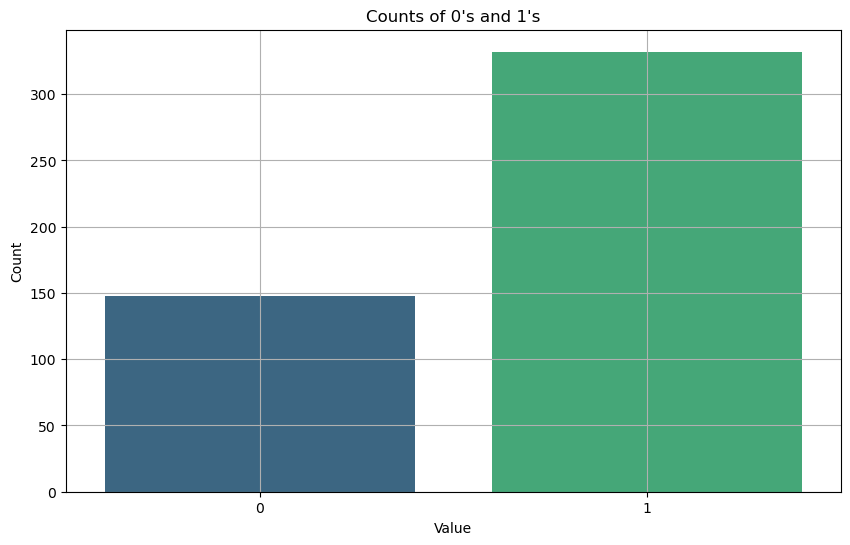

In [746]:
X_init_train = cleaned_Data.drop(columns=['Loan_Status'])
y_init_train = cleaned_Data['Loan_Status']


counts = y_init_train.value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

# Customize the plot
plt.title('Counts of 0\'s and 1\'s')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.grid(True)

# Show the plot
plt.show()

In [747]:

from sklearn.utils import resample
majority=cleaned_Data[cleaned_Data['Loan_Status']==1]
minority=cleaned_Data[cleaned_Data['Loan_Status']==0]
minority_upsampled = resample(minority,  replace=True,   n_samples=280, random_state=41) 
cleaned_Data= pd.concat([majority,minority_upsampled])

C:\Users\mahmo\AppData\Local\Temp\ipykernel_43200\645777042.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


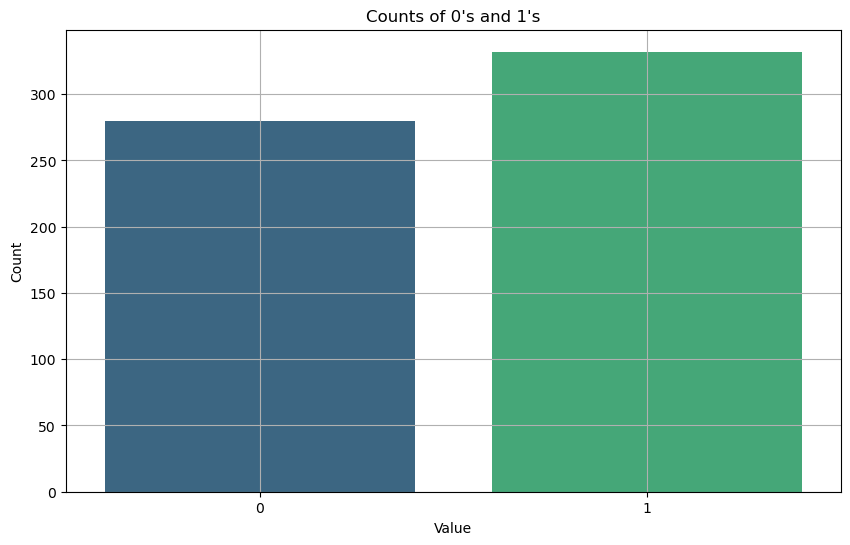

In [748]:

X_init_train = cleaned_Data.drop(columns=['Loan_Status'])
y_init_train = cleaned_Data['Loan_Status']


counts = y_init_train.value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

# Customize the plot
plt.title('Counts of 0\'s and 1\'s')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.grid(True)

# Show the plot
plt.show()

In [749]:
X = cleaned_Data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = cleaned_Data['Loan_Status']

In [750]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

 Logistic Regression

In [751]:
model1 = LogisticRegression()

In [752]:

model1.fit(X_train, Y_train)

C:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [753]:
y_pred = model1.predict(X_test)

In [754]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[25 26]
 [ 4 68]]


In [755]:
class_report = classification_report(Y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.49      0.62        51
           1       0.72      0.94      0.82        72

    accuracy                           0.76       123
   macro avg       0.79      0.72      0.72       123
weighted avg       0.78      0.76      0.74       123



In [756]:
from sklearn.neighbors import KNeighborsClassifier

In [757]:
knn_model_3 = KNeighborsClassifier(n_neighbors=3)

In [758]:
knn_model_3.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [759]:
knn_predictions_3 = knn_model_3.predict(X_test)

In [760]:
from sklearn.metrics import accuracy_score
accuracy_3 = accuracy_score(Y_test, knn_predictions_3)
print("Accuracy with 3 neighbors:", accuracy_3)

Accuracy with 3 neighbors: 0.6991869918699187


In [761]:
# Call KNN model with five neighbors
knn_model_5 = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_model_5.fit(X_train, Y_train)

# Get the predictions
knn_predictions_5 = knn_model_5.predict(X_test)

# Get the accuracy
accuracy_5 = accuracy_score(Y_test, knn_predictions_5)
print("Accuracy with 5 neighbors:", accuracy_5)

Accuracy with 5 neighbors: 0.6504065040650406


In [762]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [763]:
y_pred_gini = clf_gini.predict(X_test)

In [764]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7317


In [765]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,

In [766]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7669


In [767]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[25 26]
 [ 4 68]]


In [768]:
class_report = classification_report(Y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.49      0.62        51
           1       0.72      0.94      0.82        72

    accuracy                           0.76       123
   macro avg       0.79      0.72      0.72       123
weighted avg       0.78      0.76      0.74       123



Its the same as Logestic Regeration 

In [769]:
New_Data=pd.read_csv('New Customer.csv')

In [770]:
New_Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [771]:
New_Data.shape

(367, 12)

In [772]:
New_Data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [773]:
New_Data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [774]:
New_Data = Data.dropna()

In [775]:
New_Data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [776]:
cleaned_Data2 = pd.DataFrame(New_Data)

In [777]:
cleaned_Data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [778]:

cleaned_Data2['Gender'] = pd.Categorical(cleaned_Data2['Gender']).codes
cleaned_Data2['Married'] = pd.Categorical(cleaned_Data2['Married']).codes
cleaned_Data2['Dependents'] = pd.Categorical(cleaned_Data2['Dependents']).codes
cleaned_Data2['Education'] = pd.Categorical(cleaned_Data2['Education']).codes
cleaned_Data2['Self_Employed'] = pd.Categorical(cleaned_Data2['Self_Employed']).codes
cleaned_Data2['Property_Area'] = pd.Categorical(cleaned_Data2['Property_Area']).codes


In [779]:
cleaned_Data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int8   
 2   Married            480 non-null    int8   
 3   Dependents         480 non-null    int8   
 4   Education          480 non-null    int8   
 5   Self_Employed      480 non-null    int8   
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int8   
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), int8(6), object(2)
memory usage: 32.8+ KB


In [780]:
cleaned_Data2.drop(["Loan_ID","Loan_Status"],axis=1,inplace=True)

Using the Logistic Regression Model 

In [781]:
model1.predict(cleaned_Data2)

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [782]:
Mahmoud=(cleaned_Data2['Married']=='Yes'&cleaned_Data2['Property_Area']=='Semiurban')
Haidy=(cleaned_Data2['Married']=='Yes'&cleaned_Data2['Property_Area']=='Semiurban'&cleaned_Data2['Loan_Status']=='Y')
print(f'percentage of married people insemiurban area that obtained the loan?{(len(Haidy)/len(Mahmoud))*100}')

TypeError: Cannot perform 'rand_' with a dtyped [int8] array and scalar of type [bool]

In [783]:
model2.predict(cleaned_Data2)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,